# Logistic regression - whether a tumor is cancerous based on the tumor size

Logistic regression aims to solve classification problems.

It does this by predicting categorical outcomes.

Predict if tumor is cancerous where the size is 3.46mm: [0]
Odds: [[4.03541657]]
probability that each tumor is cancerous: [[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]


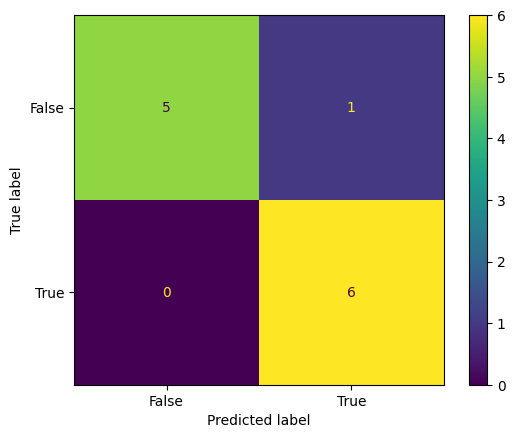

In [34]:
import numpy
from sklearn import linear_model

#X represents the size of a tumor in centimeters.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)

#Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.
#y represents whether or not the tumor is cancerous (0 for "No", 1 for "Yes").
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)


#predict if tumor is cancerous where the size is 3.46mm:
predictedtumour = logr.predict(numpy.array([3.46]).reshape(-1,1))
print("Predict if tumor is cancerous where the size is 3.46mm:",predictedtumour)
predicted = logr.predict(X.reshape(-1,1))

#Coefficient
"""
In logistic regression the coefficient is the expected change in log-odds of having the outcome per unit change in X.
"""
log_odds = logr.coef_
odds = numpy.exp(log_odds)
print("Odds:",odds)

#find out the probability that each tumor is cancerous.
def logit2prob(logr, X):
  log_odds = logr.coef_ * X + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

print("probability that each tumor is cancerous:",logit2prob(logr, X)) #find out the probability that each tumor is cancerous.
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

#actual = numpy.random.binomial(1,.9,size = 1000)
#predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [29]:
print("The probability that a tumor with the size 3.78cm is cancerous is: {}%".format(numpy.round( logit2prob(logr, 3.78)*100) ))

print("The probability that a tumor with the size 2.44cm is cancerous is: {}%".format(numpy.round( logit2prob(logr, 2.44)*100)))

print("The probability that a tumor with the size 2.09cm is cancerous is: {}% ".format(numpy.round(logit2prob(logr, 2.09)*100)))

The probability that a tumor with the size 3.78cm is cancerous is: [[61.]]%
The probability that a tumor with the size 2.44cm is cancerous is: [[19.]]%
The probability that a tumor with the size 2.09cm is cancerous is: [[13.]]% 


# Results:

 The probability that a tumor with the size 3.78cm is cancerous is 61%.

 The probability that a tumor with the size 2.44cm is cancerous is 19%.

The probability that a tumor with the size 2.09cm is cancerous is 13%.

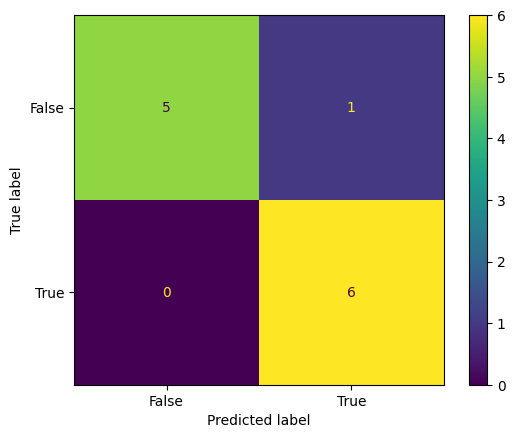

In [35]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

#actual = numpy.random.binomial(1,.9,size = 1000)
#predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [36]:
actual=y

# The matrix provides us with many useful metrics that help us to evaluate out classification model.

The different measures include:

 Accuracy, Precision, Sensitivity (Recall), Specificity, and the F1-score

# Accuracy


Accuracy measures how often the model is correct.

In [59]:
Accuracy = metrics.accuracy_score(actual, predicted)
Accuracy=numpy.round(Accuracy*100)
print(Accuracy)

92.0


# Precision

Of the positives predicted, what percentage is truly positive?

In [58]:
Precision = metrics.precision_score(actual, predicted)
Precision=numpy.round(Precision*100)
print(Precision)

86.0


Precision does not evaluate the correctly predicted negative cases

# Sensitivity/Recall

Sensitivity (sometimes called Recall) measures how good the model is at predicting positives.

In [57]:
Sensitivity_recall = metrics.recall_score(actual, predicted)
Sensitivity_recall=numpy.round(Precision*100)
print(Sensitivity_recall)

86.0


# Specificity

Specificity is similar to sensitivity, but looks at it from the persepctive of negative results.

In [55]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
Specificity=numpy.round(Specificity*100)
print(Specificity)

83.0


# F1_score

considers both false positive and false negative cases and is good for imbalanced datasets.

In [56]:
F1_score = metrics.f1_score(actual, predicted)
F1_score=numpy.round(F1_score*100)
print(F1_score)

92.0


# Metrics

In [60]:
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 92.0, 'Precision': 86.0, 'Sensitivity_recall': 86.0, 'Specificity': 83.0, 'F1_score': 92.0}
